### This assignment has 2 objectives:
1. Create a model that predicts the Survival Months of a Breast Cancer patient (dataset - breast_cancer_smonths.csv)
2. Create a model that predicts the Diagnosis (Malign or Benign) of a Breast Cancer patient (dataset - breast_cancer_diagnosis.csv)

In this file you will elaborate part 1

Write your analysis inside your comments or markdowns.

## Import the relevant libraries

### Simplify the problem

I wanna create a model to see how two variables(Survival Months and Other Independent variables) correlate with each other. Which one of those can  make patient have longer or shorter Survival Months of a Breast Cancer?

In [34]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

In [35]:
raw_data = pd.read_csv('data.csv')
raw_data

,Age,Race,Marital Status,TStage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


## Preprocessing

Consider all steps of preprocessing, but if you don't need to preprocess your data, comment with your reasons

In [36]:
#we wanna get only numeric data but also include the categorical too
raw_data.describe(include='all')

,Age,Race,Marital Status,TStage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
count,4024.000000,4024,4024,4024,4024,4024,4024,4024,4024,4024.000000,4024,4024,4024.000000,4024.000000,4024.000000,4024
unique,NaN,3,5,4,3,5,4,4,2,NaN,2,2,NaN,NaN,NaN,2
top,NaN,White,Married,T2,N1,IIA,Moderately differentiated,2,Regional,NaN,Positive,Positive,NaN,NaN,NaN,Alive
freq,NaN,3413,2643,1786,2732,1305,2351,2351,3932,NaN,3755,3326,NaN,NaN,NaN,3408
mean,53.972167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.473658,NaN,NaN,14.357107,4.158052,71.297962,NaN
std,8.963134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.119696,NaN,NaN,8.099675,5.109331,22.921430,NaN
min,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,NaN,NaN,9.000000,1.000000,56.000000,NaN
50%,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,14.000000,2.000000,73.000000,NaN
75%,61.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,NaN,19.000000,5.000000,90.000000,NaN


In [37]:
# i wanna see only numeric data 
raw_data.describe()
#as we can see there is no missing values in each counts 
# no missing value ?

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


### Exploring the PDFs


C:\Users\student.DG0072012\AppData\Local\Temp\ipykernel_2520\1225717059.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data['Survival Months'])


<Axes: xlabel='Survival Months', ylabel='Density'>

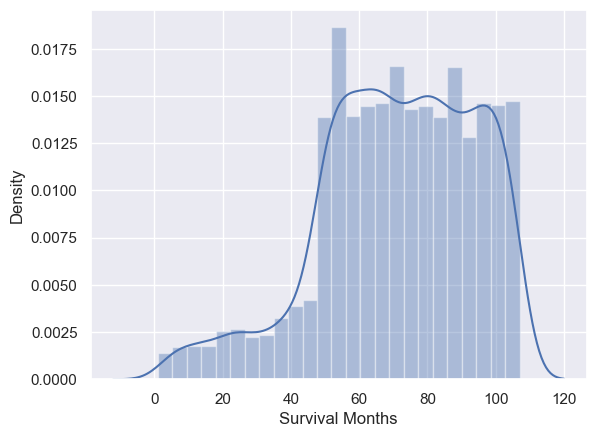

In [38]:
sns.distplot(raw_data['Survival Months'])

C:\Users\student.DG0072012\AppData\Local\Temp\ipykernel_2520\2072633207.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

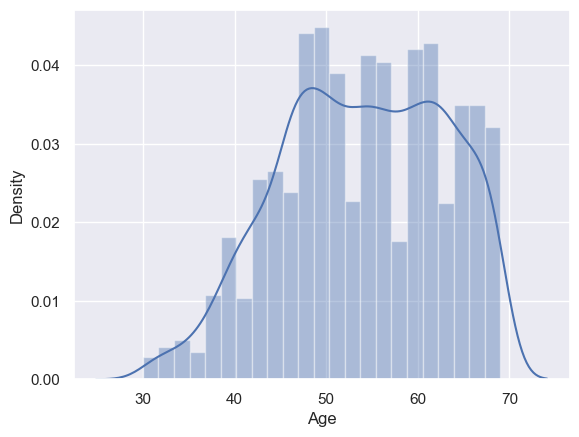

In [39]:
#Use seaborn to plot the data of Age
sns.distplot(raw_data['Age'])

C:\Users\student.DG0072012\AppData\Local\Temp\ipykernel_2520\3891678317.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data['Tumor Size'])


<Axes: xlabel='Tumor Size', ylabel='Density'>

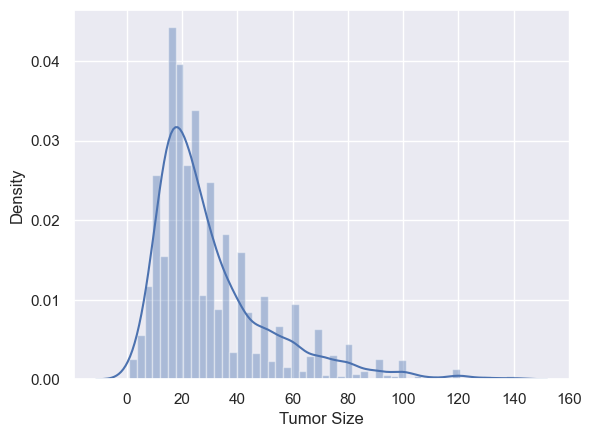

In [40]:
#Use seaborn to plot the data of Tumor Size
sns.distplot(raw_data['Tumor Size'])

C:\Users\student.DG0072012\AppData\Local\Temp\ipykernel_2520\3668440345.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data['Regional Node Examined'])


<Axes: xlabel='Regional Node Examined', ylabel='Density'>

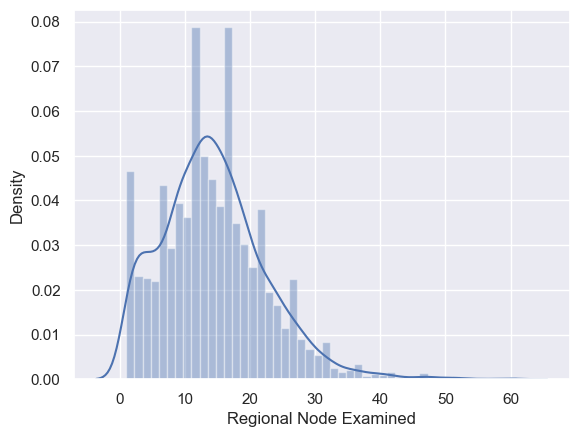

In [41]:

sns.distplot(raw_data['Regional Node Examined'])

C:\Users\student.DG0072012\AppData\Local\Temp\ipykernel_2520\2901922672.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data['Reginol Node Positive'])


<Axes: xlabel='Reginol Node Positive', ylabel='Density'>

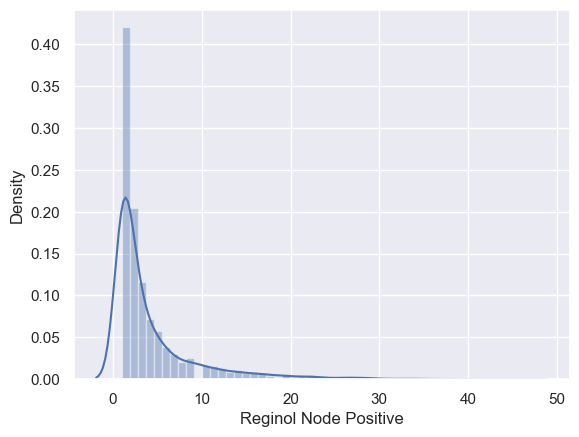

In [42]:

sns.distplot(raw_data['Reginol Node Positive'])

### Dealing with outliers

If you decide not to deal with the outliers, comment your reasons

#### Survival Months

C:\Users\student.DG0072012\AppData\Local\Temp\ipykernel_2520\1649865990.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data['Survival Months'])


,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


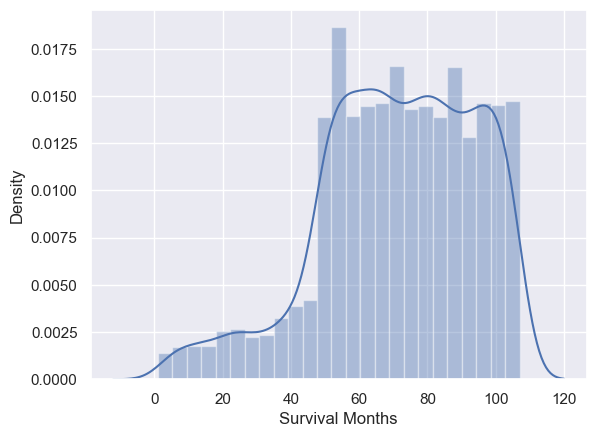

In [43]:
# (Survival Months)i dont remove outlier , 75% is 80.25
sns.distplot(raw_data['Survival Months'])
raw_data.describe()

#### Regional Node Examined

In [44]:
# max is 24 so i only filter to take 93.5%, 75% is 19.5
q =raw_data['Regional Node Examined'].quantile(0.935)
data_1 = raw_data[raw_data['Regional Node Examined']<q]
data_1.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,3734.000000,3734.000000,3734.000000,3734.000000,3734.000000
mean,53.973487,30.276915,12.962507,3.757900,71.566952
std,8.995852,20.983581,6.378262,4.219568,22.894362
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,8.000000,1.000000,56.000000
50%,54.000000,25.000000,13.000000,2.000000,73.000000
75%,61.000000,38.000000,18.000000,5.000000,90.000000
max,69.000000,140.000000,26.000000,26.000000,107.000000


C:\Users\student.DG0072012\AppData\Local\Temp\ipykernel_2520\1958449280.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Regional Node Examined'])


<Axes: xlabel='Regional Node Examined', ylabel='Density'>

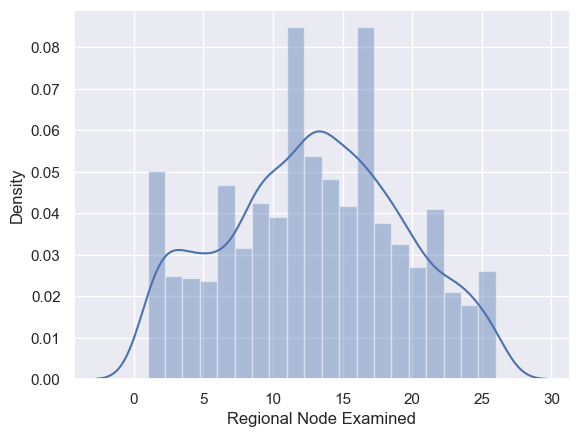

In [45]:
sns.distplot(data_1['Regional Node Examined'])

#### Reginol Node Positive

In [46]:
#i only take 80%, 75% is 3.75
q =data_1['Reginol Node Positive'].quantile(0.80)
data_2 = data_1[data_1['Reginol Node Positive']<q]
# like we need to store the filter one in new var like data_2 so as we can keep using the new version of data sheet
data_2.describe()


,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,2986.000000,2986.000000,2986.000000,2986.000000,2986.000000
mean,53.944072,27.678500,12.067314,1.998995,72.735767
std,8.952689,18.720955,6.369985,1.237195,21.970717
min,30.000000,1.000000,1.000000,1.000000,2.000000
25%,47.000000,15.000000,7.000000,1.000000,58.000000
50%,54.000000,22.000000,12.000000,2.000000,74.000000
75%,61.000000,35.000000,17.000000,3.000000,91.000000
max,69.000000,140.000000,26.000000,5.000000,107.000000


C:\Users\student.DG0072012\AppData\Local\Temp\ipykernel_2520\379054591.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Reginol Node Positive'])


<Axes: xlabel='Reginol Node Positive', ylabel='Density'>

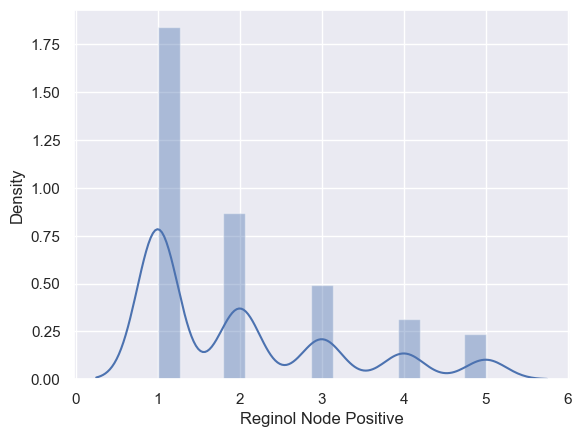

In [47]:
sns.distplot(data_2['Reginol Node Positive'])

#### Age

C:\Users\student.DG0072012\AppData\Local\Temp\ipykernel_2520\3746244157.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Age'])


<Axes: xlabel='Age', ylabel='Density'>

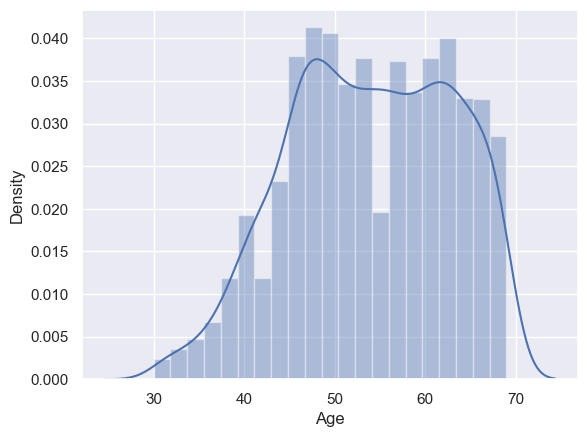

In [48]:
#(Age) I decided not to remove the outlier, because 75% of age is 61 which is close to the max age is which 69 and also histogram show that the curve didn't go too far the data
sns.distplot(data_2['Age'])

#### Tumor Size

C:\Users\student.DG0072012\AppData\Local\Temp\ipykernel_2520\1444146602.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Tumor Size'])


<Axes: xlabel='Tumor Size', ylabel='Density'>

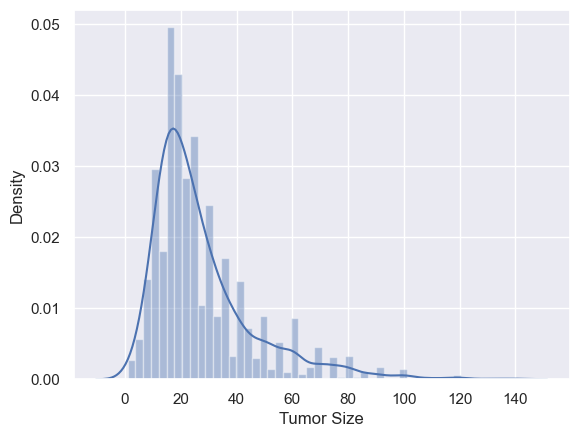

In [49]:
#(Tumor Size) I decided to remove the outlier , histogram shows the curve goes abit far from the data(probably there is some outlier data), and 75% is 38 and max is 140
sns.distplot(data_2['Tumor Size'])

In [50]:
#i removed 14%
q =data_2['Tumor Size'].quantile(0.86)
#store into the new version 
data_3 = data_2[data_2['Tumor Size']<q]
data_3.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,2529.000000,2529.000000,2529.000000,2529.000000,2529.000000
mean,54.187030,21.187426,11.965599,1.907078,73.079083
std,8.895146,9.061917,6.401271,1.181872,21.742034
min,30.000000,1.000000,1.000000,1.000000,2.000000
25%,47.000000,15.000000,7.000000,1.000000,58.000000
50%,54.000000,20.000000,12.000000,1.000000,75.000000
75%,62.000000,27.000000,17.000000,2.000000,91.000000
max,69.000000,44.000000,26.000000,5.000000,107.000000


C:\Users\student.DG0072012\AppData\Local\Temp\ipykernel_2520\1608393367.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['Tumor Size'])


<Axes: xlabel='Tumor Size', ylabel='Density'>

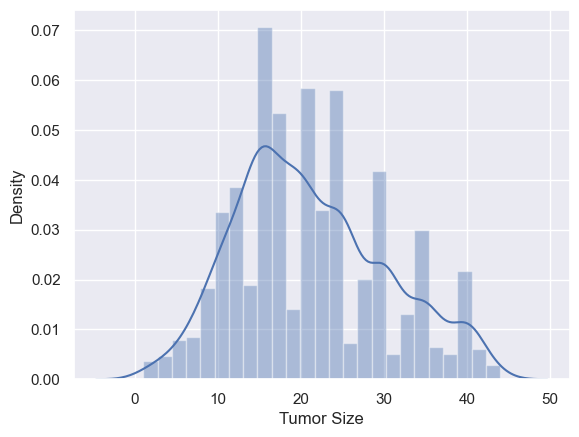

In [51]:
sns.distplot(data_3['Tumor Size'])

## Checking OLS 

Linearity, No endogeneity, Normality and homoscedasticity, No autocorrelation and No multicolinearity.
Explain your findings and fixings

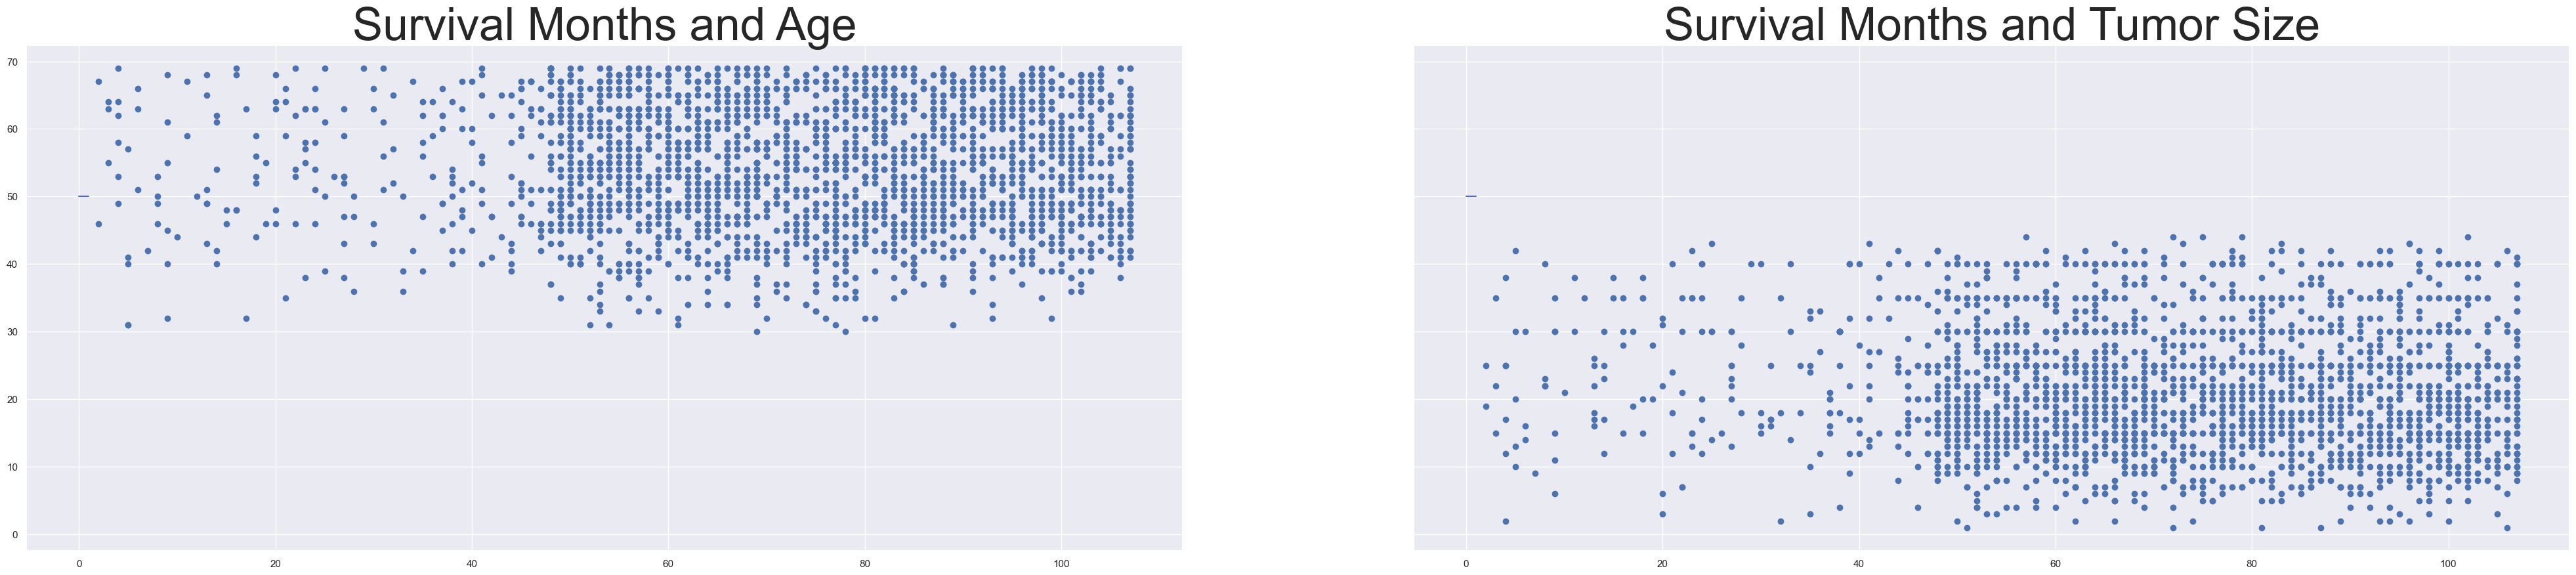

In [92]:
# 50 is width and 10 height
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(50, 10))
ax1.scatter(data_3['Survival Months'], data_3['Age']) 
ax1.set_title('Survival Months and Age',fontsize=50)
ax2.scatter(data_3['Survival Months'], data_3['Tumor Size'])
ax2.set_title('Survival Months and Tumor Size',fontsize=50)
ax1.plot( [50,50])
ax2.plot([50,50])
plt.show()


C:\Users\student.DG0072012\AppData\Local\Temp\ipykernel_2520\1172044832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3['log_Age'] = np.log(data_3['Age'])
C:\Users\student.DG0072012\AppData\Local\Temp\ipykernel_2520\1172044832.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3['log_Tumor_Size'] = np.log(data_3['Tumor Size'])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artist

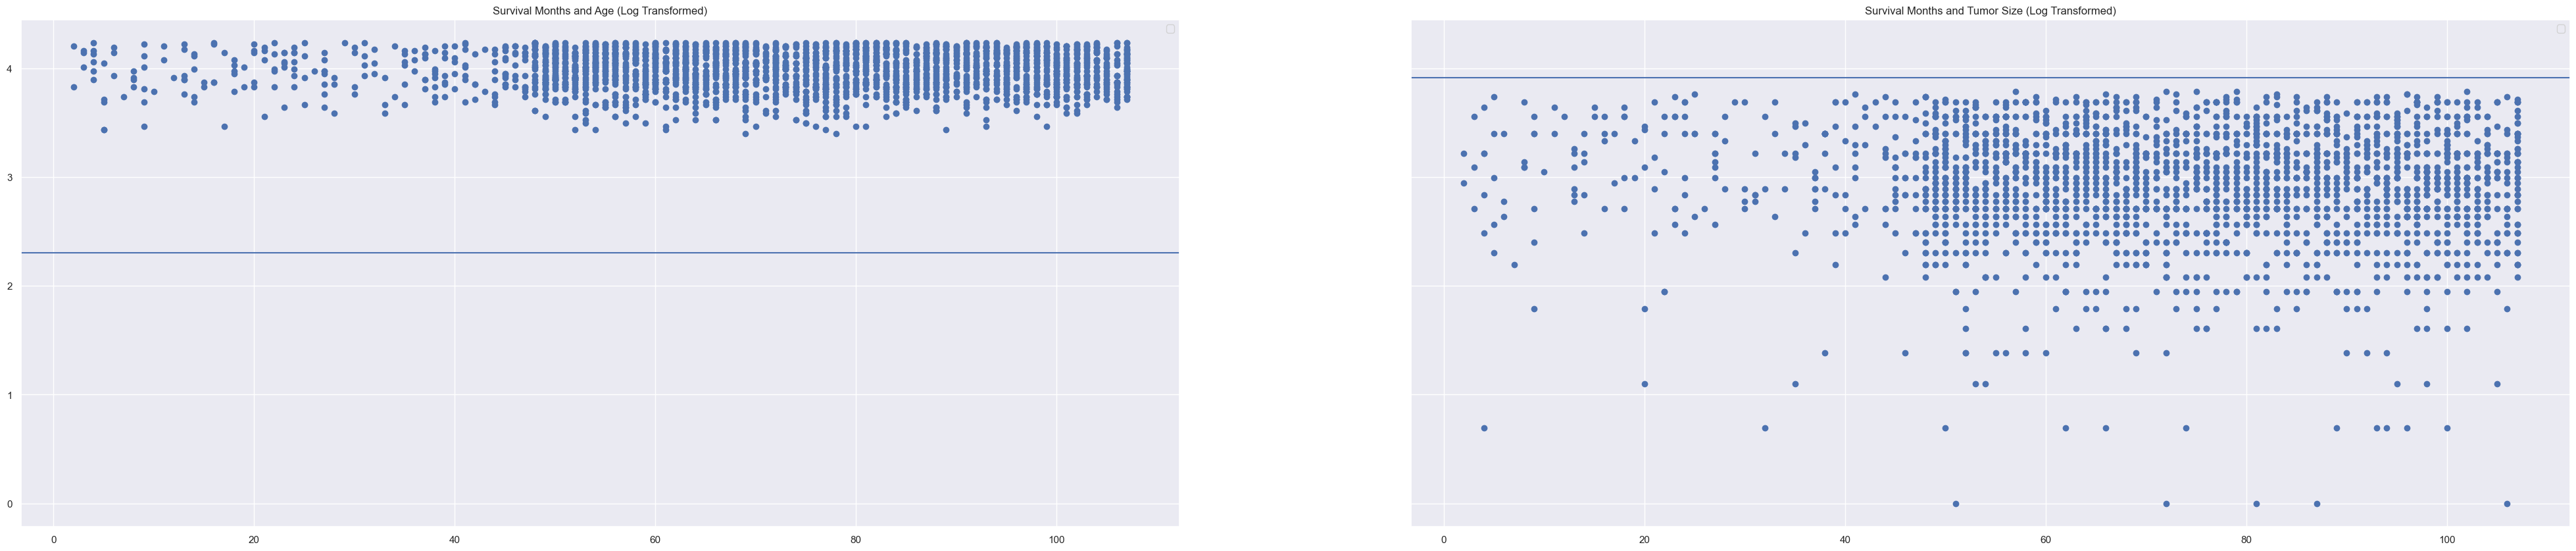

In [94]:
#transform to log
data_3['log_Age'] = np.log(data_3['Age'])
data_3['log_Tumor_Size'] = np.log(data_3['Tumor Size'])
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(50, 10))
# Scatter plot with fitting line for 'Survival Months' and 'log_Age'
ax1.scatter(data_3['Survival Months'], data_3['log_Age'])
ax1.set_title('Survival Months and Age (Log Transformed)', fontsize=12)
ax1.axhline(y=np.log(50))
ax1.legend()
# Scatter plot with fitting line for 'Survival Months' and 'log_Tumor_Size'
ax2.scatter(data_3['Survival Months'], data_3['log_Tumor_Size'])
ax2.set_title('Survival Months and Tumor Size (Log Transformed)', fontsize=12)
ax2.axhline(y=np.log(50))
ax2.legend()
plt.show()

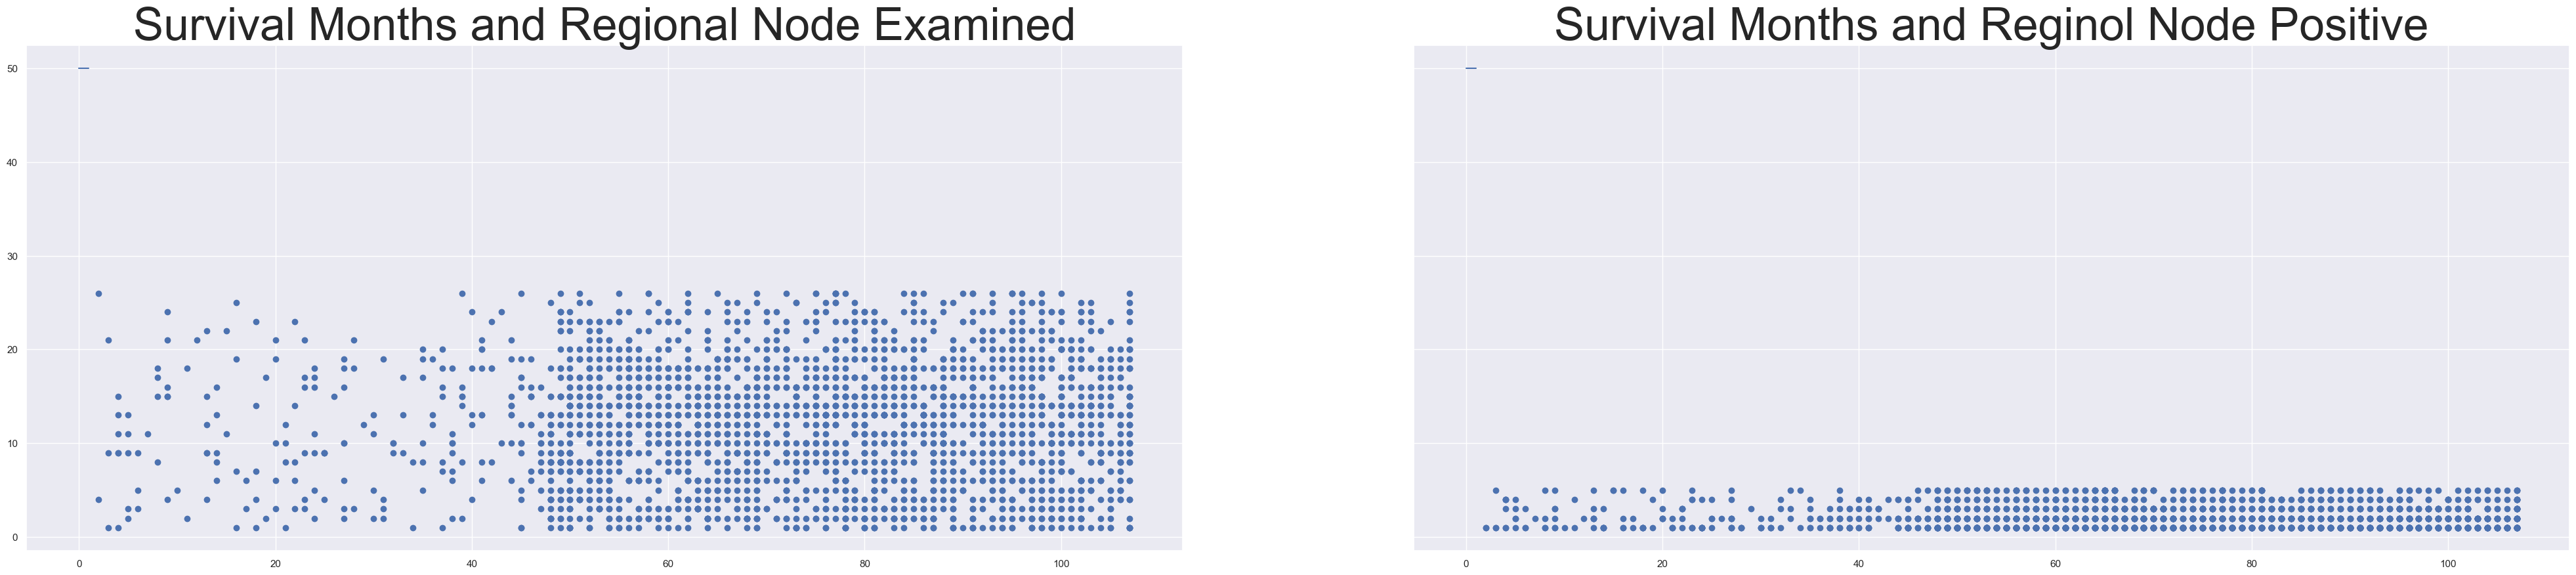

In [54]:
fig, (ax3, ax4) = plt.subplots(1, 2, sharey=True, figsize=(50, 10))
ax3.scatter(data_3['Survival Months'], data_3['Regional Node Examined'])
ax3.set_title('Survival Months and Regional Node Examined',fontsize=50)
ax4.scatter(data_3['Survival Months'], data_3['Reginol Node Positive'])
ax4.set_title('Survival Months and Reginol Node Positive',fontsize=50)
ax3.plot([50, 50])
ax4.plot([50, 50])
plt.show()

### Relaxing the assumptions

In [56]:
# Let's transform 'Survival Months' with a log transformation
log_survival_months = np.log(data_3['Survival Months'])

# Then we add it to our data frame
data_3['log_survival_months'] = log_survival_months 
data_3

C:\Users\student.DG0072012\AppData\Local\Temp\ipykernel_2520\1136792549.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3['log_survival_months'] = log_survival_months


,Age,Race,Marital Status,TStage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,log_Age,log_Tumor_Size,log_survival_months
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive,4.219508,1.386294,4.094345
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive,3.912023,3.555348,4.127134
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive,4.060443,2.890372,4.430817
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive,3.850148,3.713572,3.912023
5,51,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,18,2,89,Alive,3.931826,2.995732,4.488636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4018,64,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,10,Positive,Positive,11,1,70,Alive,4.158883,2.302585,4.248495
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive,4.127134,2.197225,3.891820
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive,4.219508,3.091042,4.234107
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive,4.060443,3.784190,4.276666


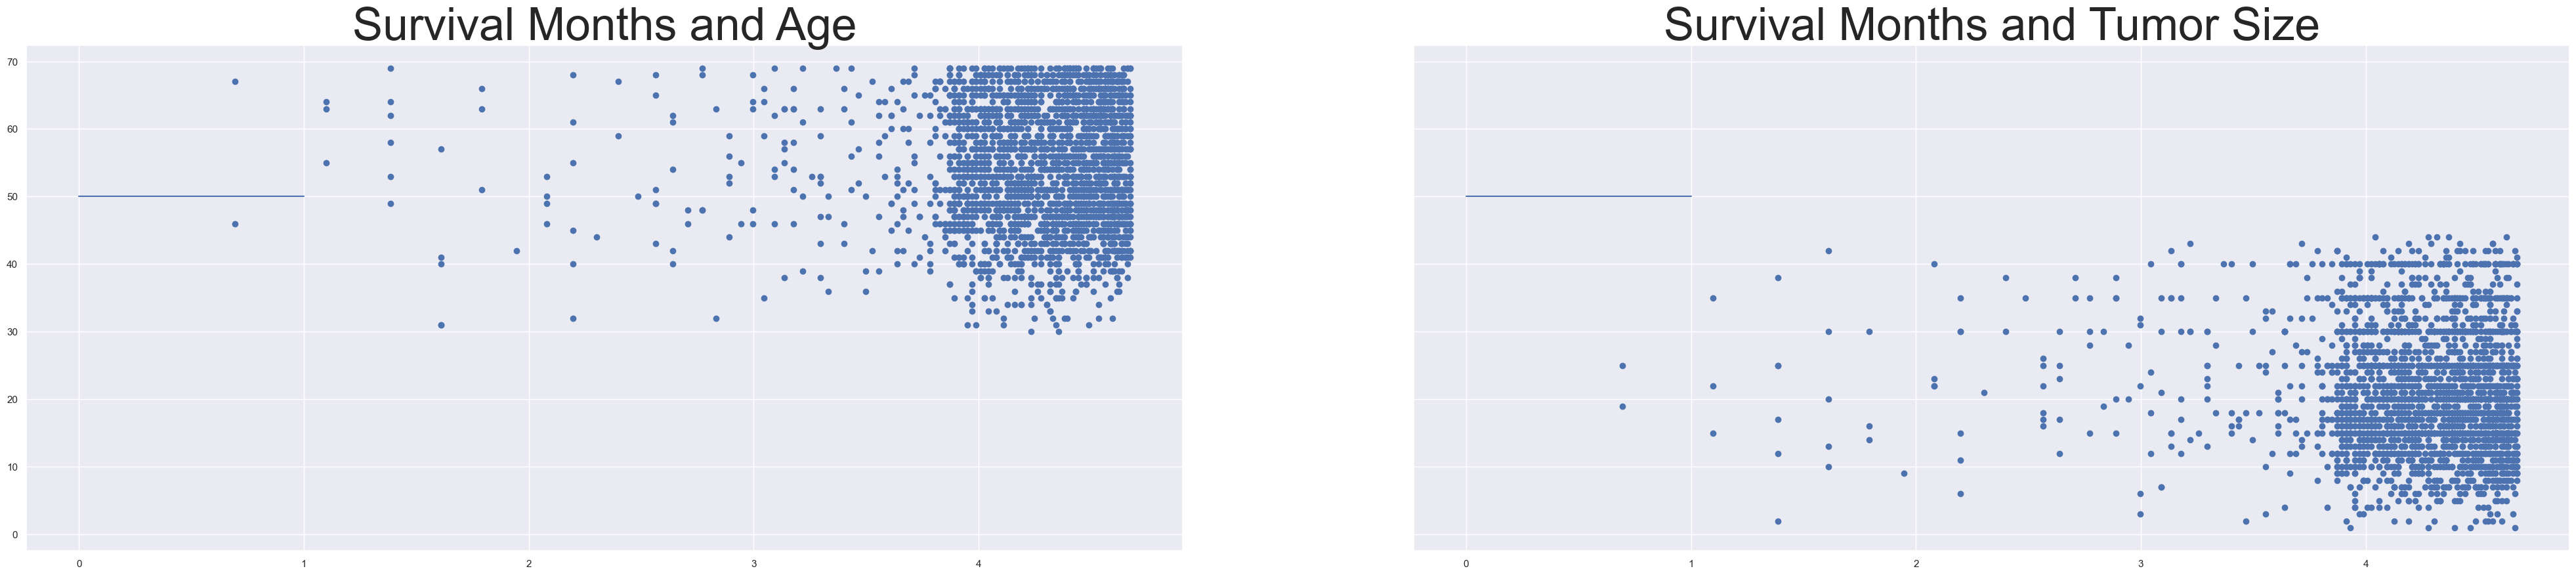

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(50, 10))
ax1.scatter(data_3['log_survival_months'], data_3['Age'])
ax1.set_title('Survival Months and Age',fontsize=50)
ax2.scatter(data_3['log_survival_months'], data_3['Tumor Size'])
ax2.set_title('Survival Months and Tumor Size',fontsize=50)
ax1.plot( [50,50])
ax2.plot([50,50])
plt.show()


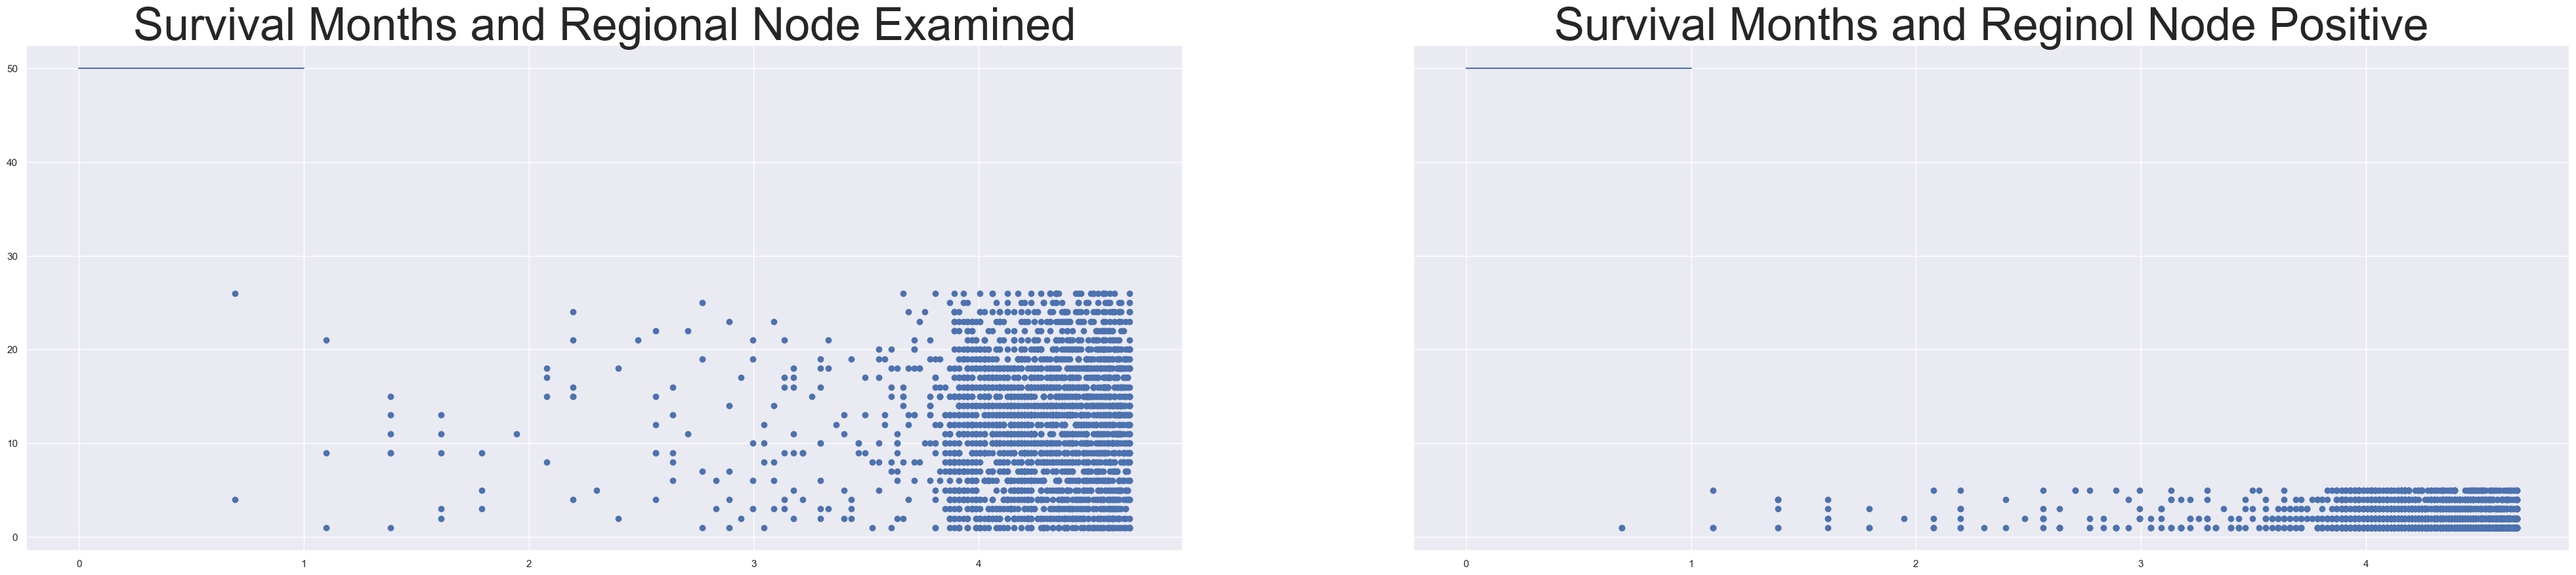

In [58]:
fig, (ax3, ax4) = plt.subplots(1, 2, sharey=True, figsize=(50, 10))
ax3.scatter(data_3['log_survival_months'], data_3['Regional Node Examined'])
ax3.set_title('Survival Months and Regional Node Examined',fontsize=50)
ax4.scatter(data_3['log_survival_months'], data_3['Reginol Node Positive'])
ax4.set_title('Survival Months and Reginol Node Positive',fontsize=50)
ax3.plot([50, 50])
ax4.plot([50, 50])
plt.show()

### Multicollinearity

In [59]:
#value what ?
data_3.columns.values

array(['Age', 'Race', 'Marital Status', 'TStage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size',
       'Estrogen Status', 'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status', 'log_Age',
       'log_Tumor_Size', 'log_survival_months'], dtype=object)

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#store our numerical data to variables
variables = data_3[['Regional Node Examined','Reginol Node Positive','Age', 'Tumor Size']]
vif = pd.DataFrame()
#Loop through te columns of the variables DataFrame and apply the variance_inflation_factor to each column
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [61]:
# 1 = no multi..., also min value  (1<VIF<5) ok, VIF>5 is not ok
vif

,VIF,Features
0,4.445778,Regional Node Examined
1,3.908062,Reginol Node Positive
2,7.389526,Age
3,6.119812,Tumor Size


In [62]:
# VIF of age is 7.16 so we drop it
data_no_multicollinearity = data_3.drop(['Age'],axis=1)

## Map the data / or... create dummy variables

use pandas get.dummies for mapping the data

Obs: You might need or not drop more features after the dummies depending on their VIF

In [63]:
#get all categorical and create dummies
# drop_first = true if one is created others won't create like N-1
#high VIF for dummy var -> high correlated with each other -> difficult to interpret the impact of each category
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [64]:
#head what ?
data_with_dummies.head()

,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,log_Age,log_Tumor_Size,log_survival_months,Race_Other,Race_White,Marital Status_Married,...,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated,Grade_1,Grade_2,Grade_3,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive,Status_Dead
0,4,24,1,60,4.219508,1.386294,4.094345,False,True,True,...,True,False,False,False,False,True,True,True,True,False
1,35,14,5,62,3.912023,3.555348,4.127134,False,True,True,...,False,False,False,False,True,False,True,True,True,False
3,18,2,1,84,4.060443,2.890372,4.430817,False,True,True,...,True,False,False,False,False,True,True,True,True,False
4,41,3,1,50,3.850148,3.713572,3.912023,False,True,True,...,True,False,False,False,False,True,True,True,True,False
5,20,18,2,89,3.931826,2.995732,4.488636,False,True,False,...,False,False,False,False,True,False,True,True,True,False


In [65]:
#value what ?
data_with_dummies.columns.values

array(['Tumor Size', 'Regional Node Examined', 'Reginol Node Positive',
       'Survival Months', 'log_Age', 'log_Tumor_Size',
       'log_survival_months', 'Race_Other', 'Race_White',
       'Marital Status_Married', 'Marital Status_Separated',
       'Marital Status_Single ', 'Marital Status_Widowed', 'TStage _T2',
       'TStage _T3', 'TStage _T4', 'N Stage_N2', 'N Stage_N3',
       '6th Stage_IIB', '6th Stage_IIIA', '6th Stage_IIIB',
       '6th Stage_IIIC', 'differentiate_Poorly differentiated',
       'differentiate_Undifferentiated',
       'differentiate_Well differentiated', 'Grade_1', 'Grade_2',
       'Grade_3', 'A Stage_Regional', 'Estrogen Status_Positive',
       'Progesterone Status_Positive', 'Status_Dead'], dtype=object)

In [66]:
# store properties in array to cols
cols = ['Tumor Size', 'Regional Node Examined', 'Reginol Node Positive',
'Survival Months', 'log_Age', 'log_Tumor_Size',
'log_survival_months', 'Race_Other', 'Race_White',
'Marital Status_Married', 'Marital Status_Separated',
'Marital Status_Single ', 'Marital Status_Widowed', 'TStage _T2',
'TStage _T3', 'TStage _T4', 'N Stage_N2', 'N Stage_N3',
'6th Stage_IIB', '6th Stage_IIIA', '6th Stage_IIIB',
'6th Stage_IIIC', 'differentiate_Poorly differentiated',
'differentiate_Undifferentiated',
'differentiate_Well differentiated', 'Grade_1', 'Grade_2',
'Grade_3', 'A Stage_Regional', 'Estrogen Status_Positive',
'Progesterone Status_Positive', 'Status_Dead']

In [67]:
# Then store in new var named data_preprocessed
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,log_Age,log_Tumor_Size,log_survival_months,Race_Other,Race_White,Marital Status_Married,...,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated,Grade_1,Grade_2,Grade_3,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive,Status_Dead
0,4,24,1,60,4.219508,1.386294,4.094345,False,True,True,...,True,False,False,False,False,True,True,True,True,False
1,35,14,5,62,3.912023,3.555348,4.127134,False,True,True,...,False,False,False,False,True,False,True,True,True,False
3,18,2,1,84,4.060443,2.890372,4.430817,False,True,True,...,True,False,False,False,False,True,True,True,True,False
4,41,3,1,50,3.850148,3.713572,3.912023,False,True,True,...,True,False,False,False,False,True,True,True,True,False
5,20,18,2,89,3.931826,2.995732,4.488636,False,True,False,...,False,False,False,False,True,False,True,True,True,False


## Linear regression model using Sklearn

### Declare the inputs and the targets

In [68]:
# values that are stored in target variable is what we want machine learning model to predict
targets = data_preprocessed['log_survival_months']
# The inputs will contain all other variables (excluding the target) that will be used as inputs for machine learning model. 
#why drop log_survival_months
inputs = data_preprocessed.drop(['log_survival_months'],axis=1)

### Scale the data
Feature scaling is a method used to normalize the range of independent variables or features of data.
The range of all features should be normalized so that each feature contributes approximately proportionately to the final target.

Only scale the data if you think you need to

In [69]:
from sklearn.preprocessing import StandardScaler
# Create a scaler object
#scaler what ?
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [70]:
# Scale the features and store them in a new variable called inputs_scaled
inputs_scaled = scaler.transform(inputs)

### Split the data (train/test)


In [71]:
from sklearn.model_selection import train_test_split
# Split the variables with an 80-20 split and some random state
# Adding random_state 365
#why add specially 365 ?
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Regression

In [72]:
from sklearn.linear_model import LinearRegression
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [73]:
y_hat = reg.predict(x_train)

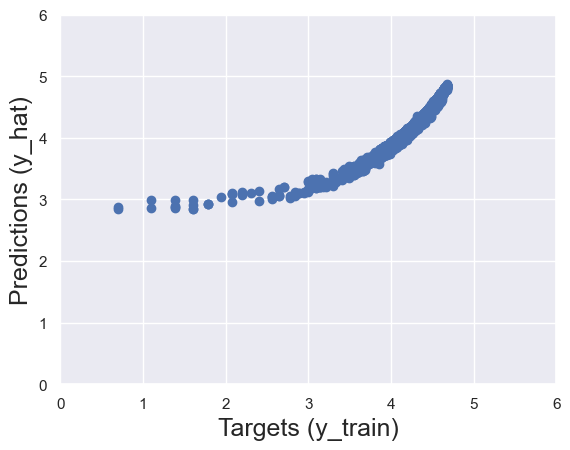

Shape of x_train: (2023, 31)
Shape of y_train: (2023,)


In [74]:
# Plot them into scatter plot
# Our points are close to 45 degree
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(0,6)
plt.ylim(0,6)
plt.show()
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)

C:\Users\student.DG0072012\AppData\Local\Temp\ipykernel_2520\1131456879.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)


Text(0.5, 1.0, 'Residuals PDF')

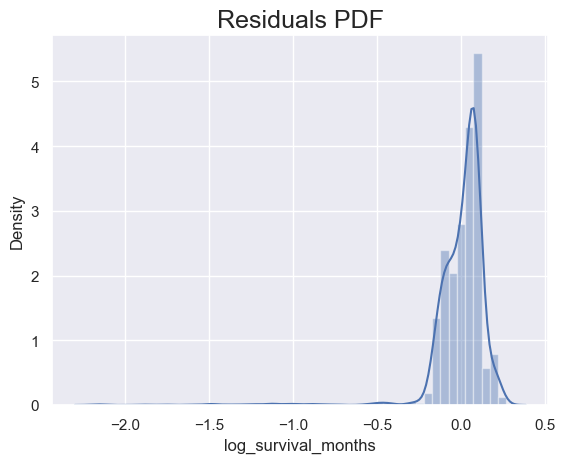

In [75]:
# Plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)
# Best one should be looked like normal distribution
plt.title("Residuals PDF", size=18)

In [76]:
# Find the R-squared of the model
reg.score(x_train,y_train)
#model captures and accounts for about 83.7% of the variability in the target variable based on the relationships it has learned from the input (x_train)

0.8368600828082848

### Finding Weights and Bias

In [77]:
# intercept is b from equation y = mx + b
reg.intercept_

4.223309017779449

In [78]:
# where m is coef or input
reg.coef_


array([-7.34341495e-03,  2.44442481e-03,  2.38251775e-03,  3.86121991e-01,
        6.89268947e-03,  9.76372927e-03, -5.07428334e-03, -2.69299417e-03,
        7.39517431e-03,  3.62916623e-04, -5.16876890e-04,  2.78311646e-03,
       -8.40203515e-03,  3.52347220e-03, -4.17131577e+12,  9.18838064e-03,
       -4.55249392e+11,  8.85880184e-03, -6.70770189e-03,  4.17131577e+12,
        4.55249392e+11, -3.51329076e+11, -2.63227781e+10, -3.34180973e+11,
        1.36749994e+11, -2.65592435e+11,  1.18829560e+11,  2.65223971e-03,
        8.00743223e-03,  3.69013402e-03, -3.74511167e-02])

In [79]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
# Assign Weights to coef or each columns
reg_summary['Weights'] = reg.coef_
reg_summary
#Coefficients represent the change in the target variable (Survival Months) for a one-unit.
#Tumor Size has negative coef lead to decrease survival months
#Regional Node Examined has positive coef lead to increase survival months
#Reginol Node Positive has positive coef lead to increase survival months
#Age has the highest positive coef lead to increase survival months,and also the most significant impact on predicting survival months.  
# log_age is high means chances to live is shorter 

,Features,Weights
0,Tumor Size,-7.343415e-03
1,Regional Node Examined,2.444425e-03
2,Reginol Node Positive,2.382518e-03
3,Survival Months,3.861220e-01
4,log_Age,6.892689e-03
5,log_Tumor_Size,9.763729e-03
6,Race_Other,-5.074283e-03
7,Race_White,-2.692994e-03
8,Marital Status_Married,7.395174e-03
9,Marital Status_Separated,3.629166e-04


In [80]:
# Check the different categories in the 'Race' variable
data_3['Race'].unique()


array(['White', 'Black', 'Other'], dtype=object)

### Testing

In [81]:
# Our test inputs are 'x_test', while the outputs: 'y_test' 
y_hat_test = reg.predict(x_test)

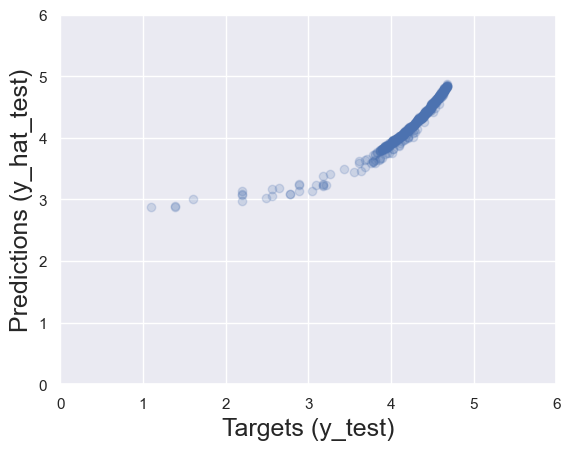

In [82]:
# Create a scatter plot with the test targets and the test predictions
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(0,6)
plt.ylim(0,6)
#predictions are far off , so it's over-fitting
plt.show()

### Prediction

In [83]:
#Coverting our predictions which is transformed log format to original format by using exp function
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,76.590710
1,99.127844
2,69.103200
3,62.996032
4,95.665467


In [84]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,76.590710,NaN
1,99.127844,62.0
2,69.103200,NaN
3,62.996032,NaN
4,95.665467,NaN
...,...,...
501,74.277318,NaN
502,36.581302,NaN
503,94.251318,NaN
504,103.769193,NaN


### Conclusion

In my final consumption,These models are created to show the relationship between how can patient's survival months depends on Tumor size, Age, Regional Node Examined, and Reginol Node Positive. Tumor size has negative influence on survival months, larger tumor sizes are, the shorter survival months.Age has positive influence on survival, the older patients tend to have longer survival(log_age is bigger the age is smaller).Reginol node Examined and Reginol Node Positive have a positive influence, the more reginol node examined , the longer survival months.